### **Importando Bibliotecas**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Leyendo archivo del Titanic y enseñandolo**

In [3]:
df = pd.read_csv("data/Titanic-Dataset.csv", index_col="PassengerId")
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


**Mostrar información del dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Name      183 non-null    object 
 3   Sex       183 non-null    object 
 4   Age       183 non-null    float64
 5   SibSp     183 non-null    int64  
 6   Parch     183 non-null    int64  
 7   Ticket    183 non-null    object 
 8   Fare      183 non-null    float64
 9   Cabin     183 non-null    object 
 10  Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 17.2+ KB


**Mostrando Estadísticas descriptivas**

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


**Mostrando filas y columnas**

In [6]:
print(f'El número de filas y columnas son: {df.shape}')

El número de filas y columnas son: (183, 11)


### **Duplicados y Nulos***

In [7]:
duplicados = df.duplicated().sum()

if duplicados > 0:
    print(f'Se encontraron {duplicados} filas duplicadas. Procediendo a eliminarlas')
    df.drop_duplicates(inplace=True) # Para eliminar los duplicados
else:
    print(f'No se encontraron filas duplicadas. No es necesario eliminarlas.')

print(f'Dimensiones tras el paso de duplicados: {df.shape}')

No se encontraron filas duplicadas. No es necesario eliminarlas.
Dimensiones tras el paso de duplicados: (183, 11)


## **Identificando y eliminando Nulos**

In [8]:
columnas_nulos = df.isnull().sum()
filas_nulos = df[df.isnull().any(axis=1)] # eje x
total_nulos = columnas_nulos.sum()

**Columnas con Nulos**

In [9]:
columnas_nulos

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**Filas con Nulos**

In [10]:
filas_nulos

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


**Total de Nulos**

In [11]:
print(f'El total de nulos es de: {total_nulos}')

El total de nulos es de: 0


### **Creando variable con datos sin nulos**

In [12]:
df_sin_nulos = df.dropna()
df_sin_nulos

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


### **Eliminando datos Nulos y reemplazando datos Nulos de Age, Embarked y Survived**

In [13]:
# Imputación y eliminación
if columnas_nulos['Age'] > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())
    print('Reemplazando de nulos por la mediana!')
else:
    print('No hay valores nulos que limpiar')

if columnas_nulos['Embarked'] > 0:
    df.dropna(subset=['Embarked'], inplace=True)
    print('Limpieza de nulos completadas!')
else:
    print('No hay valores nulos que limpiar')

if columnas_nulos['Survived'] > 0:
    df.dropna(subset=['Survived'], inplace=True)
    print('Limpieza de nulos completada!')
else:
    print('No hay valores nulos que limpiar')

No hay valores nulos que limpiar
No hay valores nulos que limpiar
No hay valores nulos que limpiar


### **Creando filtro por sexo**

In [14]:
def filtro_sexo_male(Sex):
    return 'male' in Sex

def filtro_sexo_female(Sex):
    return 'female' in Sex

sexo_male = df_sin_nulos[df_sin_nulos['Sex'].apply(filtro_sexo_male)]
sexo_female = df_sin_nulos[df_sin_nulos['Sex'].apply(filtro_sexo_female)]

**Tabla **

In [15]:
sexo_male.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [16]:
sexo_female.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


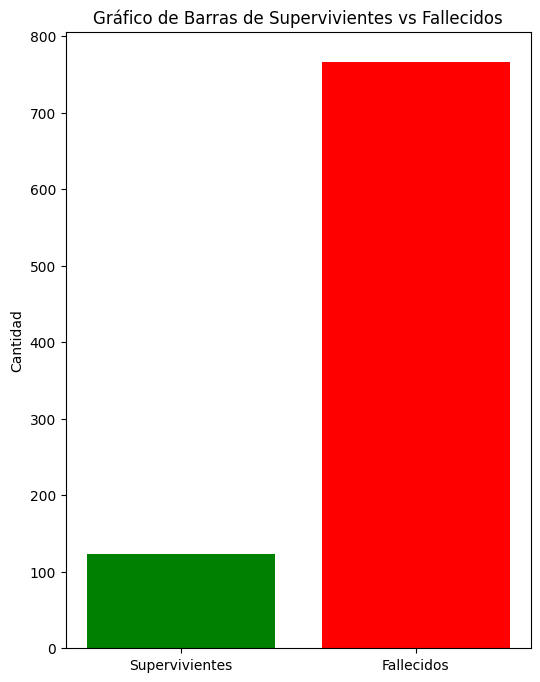

In [17]:
supervivientes = df_sin_nulos['Survived'].sum()
fallecidos = 890 - int(supervivientes)

plt.figure(figsize=(6, 8))
plt.bar(["Supervivientes", "Fallecidos"], [supervivientes, fallecidos], color=["green", "red"] )
plt.title("Gráfico de Barras de Supervivientes vs Fallecidos")
plt.ylabel("Cantidad") # Agrega el titulo del eje y

plt.show()

In [18]:
output = "data/Titanic-Dataset.csv"
df_sin_nulos.to_csv(output)